In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [161]:
data = pd.read_csv('kalimati1.csv')

In [162]:
data.head()

,Commodity,Date,Minimum,Maximum,Average
0,Tomato Big(Nepali),2013-06-16,35.0,40.0,37.5
1,Tomato Small(Local),2013-06-16,26.0,32.0,29.0
2,Potato Red,2013-06-16,20.0,21.0,20.5
3,Potato White,2013-06-16,15.0,16.0,15.5
4,Onion Dry (Indian),2013-06-16,28.0,30.0,29.0


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305192 entries, 0 to 305191
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Commodity  305192 non-null  object 
 1   Date       305192 non-null  object 
 2   Minimum    305192 non-null  float64
 3   Maximum    305192 non-null  float64
 4   Average    305192 non-null  float64
dtypes: float64(3), object(2)
memory usage: 11.6+ MB


In [164]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [165]:
# Check for any missing values
data.isnull().sum()


Commodity    0
Date         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [166]:
# Summary statistics for numeric columns
data.describe()

,Date,Minimum,Maximum,Average
count,305192,305192.000000,305192.000000,305192.000000
mean,2019-07-01 22:31:53.947940864,98.248949,110.044559,104.351408
min,2013-06-16 00:00:00,0.000000,0.000000,0.000000
25%,2016-09-12 00:00:00,40.000000,50.000000,45.000000
50%,2019-11-03 00:00:00,70.000000,80.000000,75.000000
75%,2022-04-30 00:00:00,120.000000,130.000000,125.000000
max,2024-06-12 00:00:00,2000.000000,2500.000000,2250.000000
std,NaN,93.702358,103.492979,98.639921


In [167]:
selected_commodities = data['Commodity'].value_counts().head(5).index.tolist()

In [168]:
data['Commodity'].value_counts().head(20).index.tolist()

['Cauli Local',
 'Ginger',
 'Chilli Dry',
 'Banana',
 'Coriander Green',
 'Bamboo Shoot',
 'Brd Leaf Mustard',
 'Cabbage(Local)',
 'French Bean(Local)',
 'Potato Red',
 'Chilli Green',
 'Onion Green',
 'Carrot(Local)',
 'Garlic Dry Chinese',
 'Brinjal Long',
 'Mushroom(Kanya)',
 'Lime',
 'Capsicum',
 'Onion Dry (Indian)',
 'Tamarind']

In [169]:
selected_commodities = ['Cauli Local', 'Ginger', 'Potato Red', 'Carrot(Local)', 'Cabbage(Local)']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


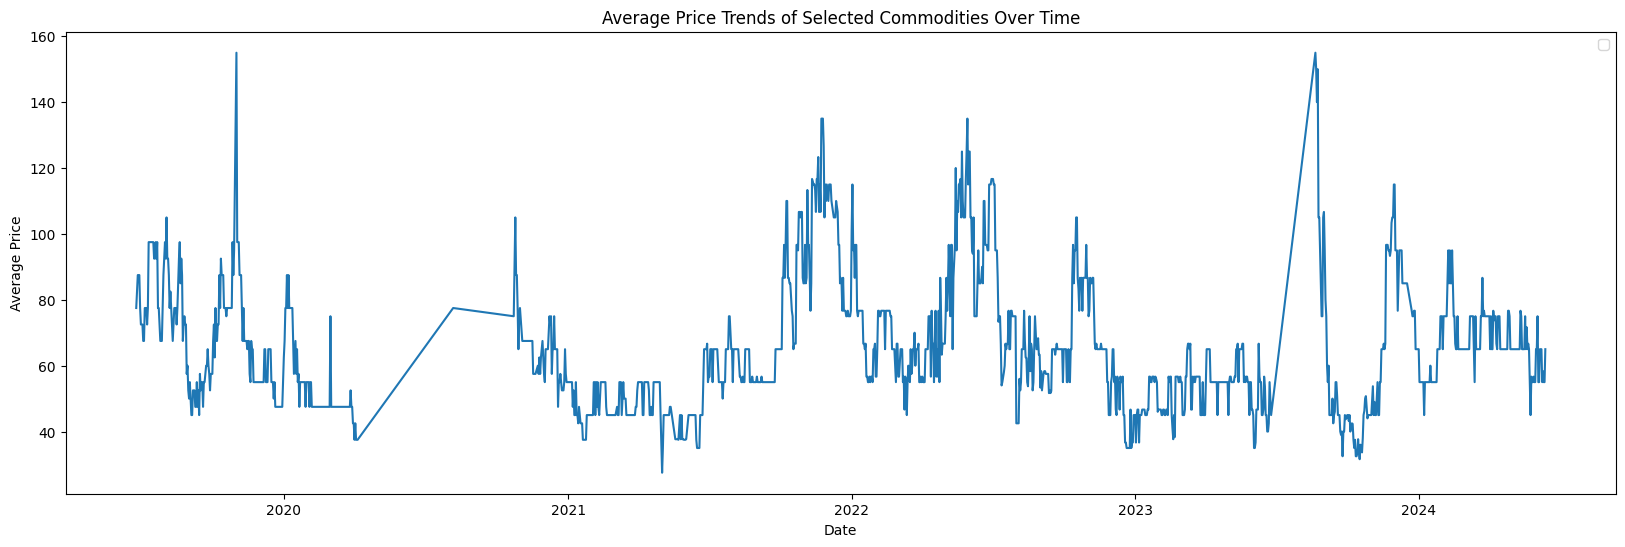

In [170]:
# Plotting time series for each selected commodity
plt.figure(figsize=(20, 6))

subset = data[data['Commodity'] == 'Tomato Big(Indian)']
plt.plot(subset['Date'], subset['Average'])

plt.title('Average Price Trends of Selected Commodities Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

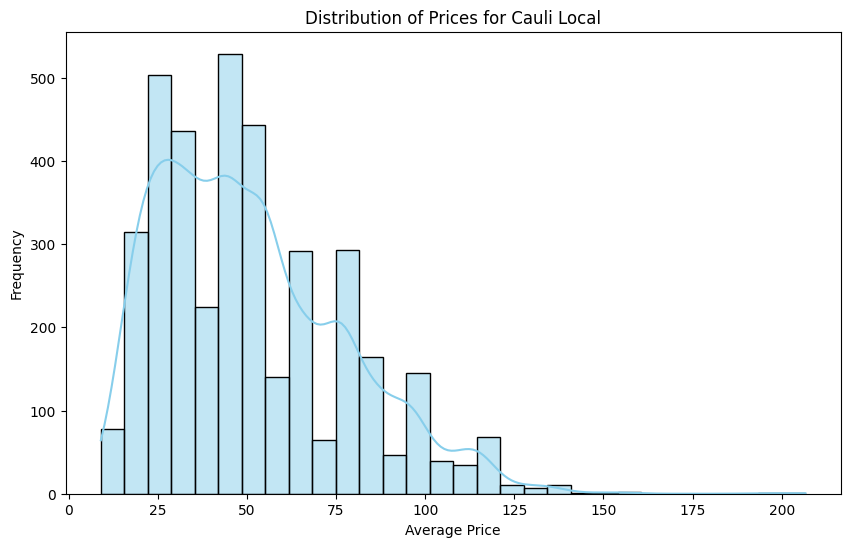

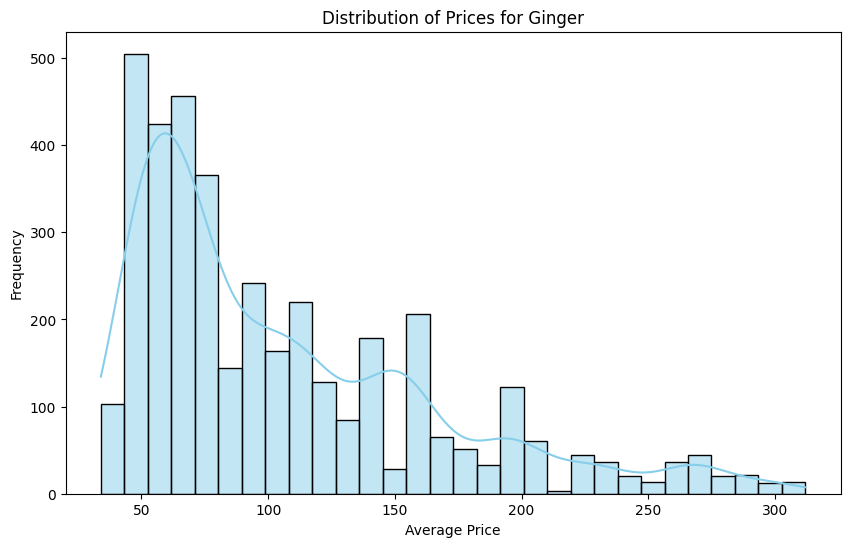

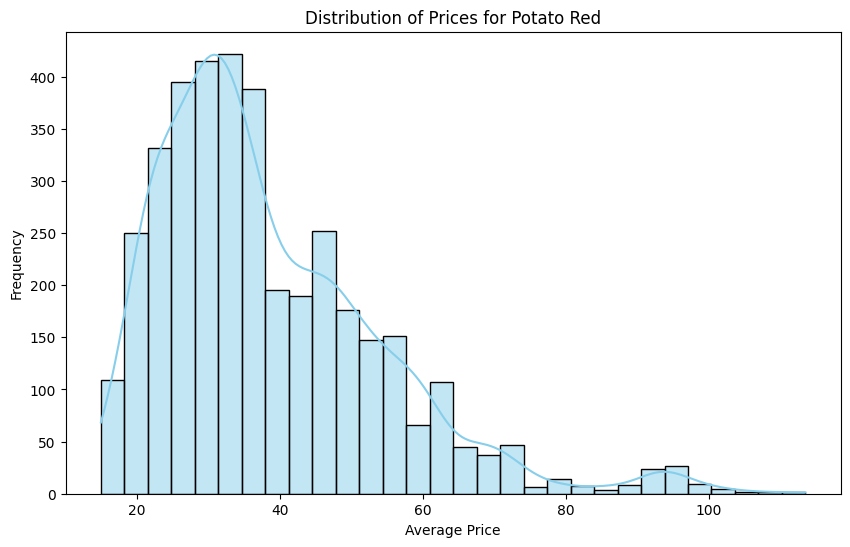

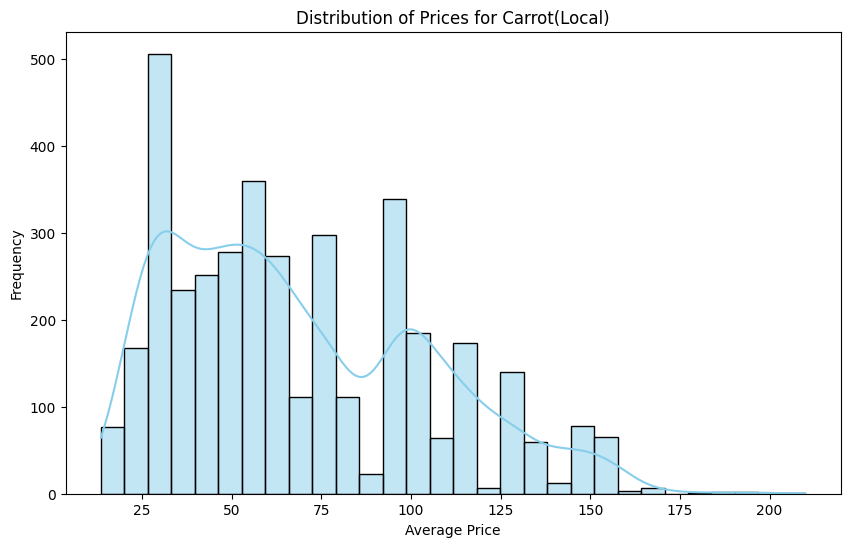

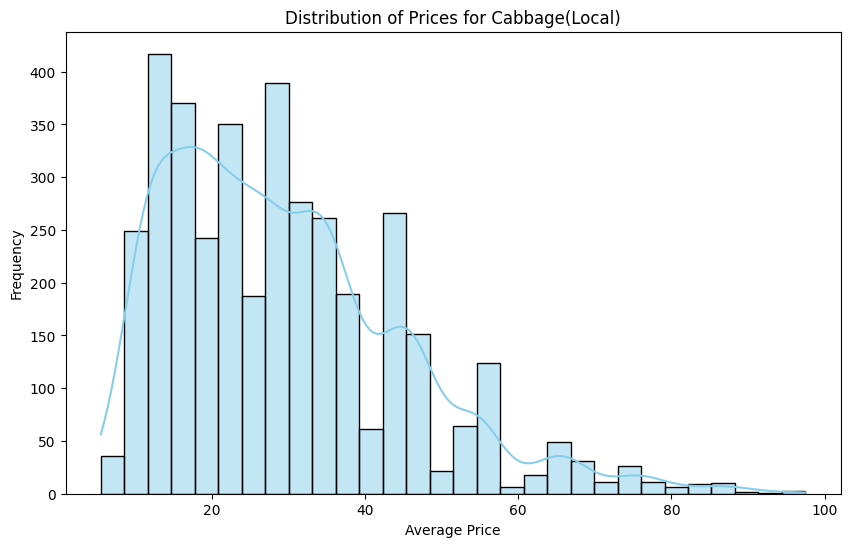

In [199]:
for commodity in selected_commodities:
        subset = data[data['Commodity'] == commodity]['Average']
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.histplot(subset, bins=30, kde=True, color='skyblue', ax=ax)
        ax.set_xlabel('Average Price')
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribution of Prices for {commodity}')
        plt.show()

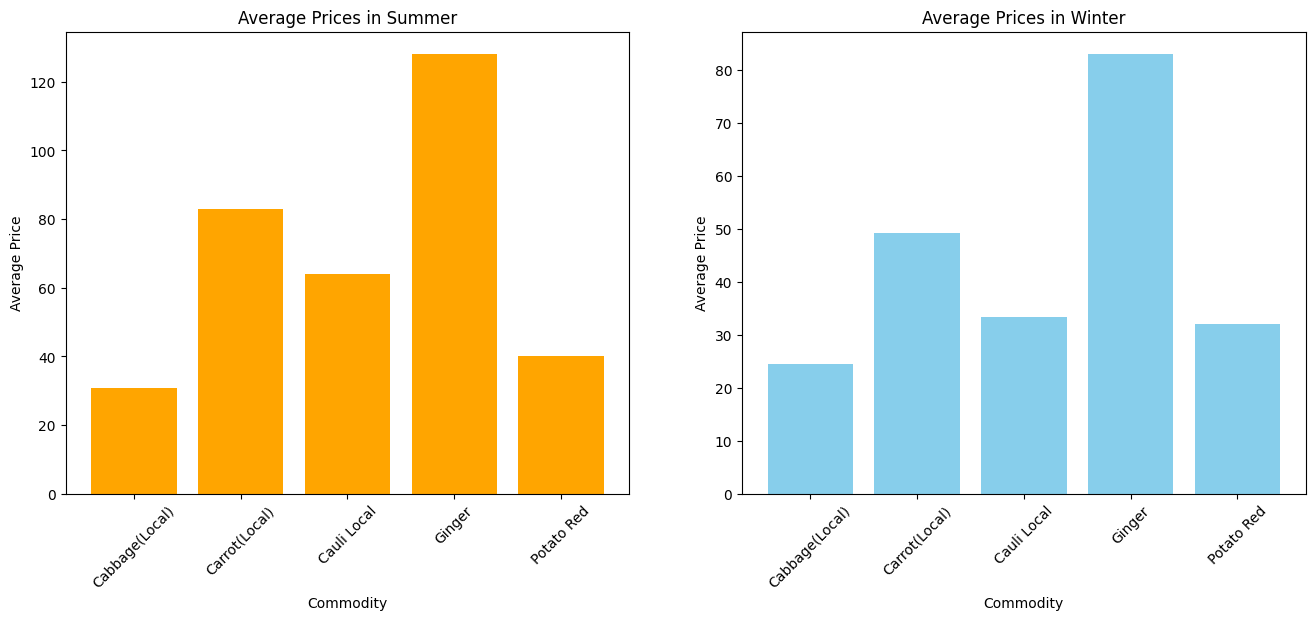

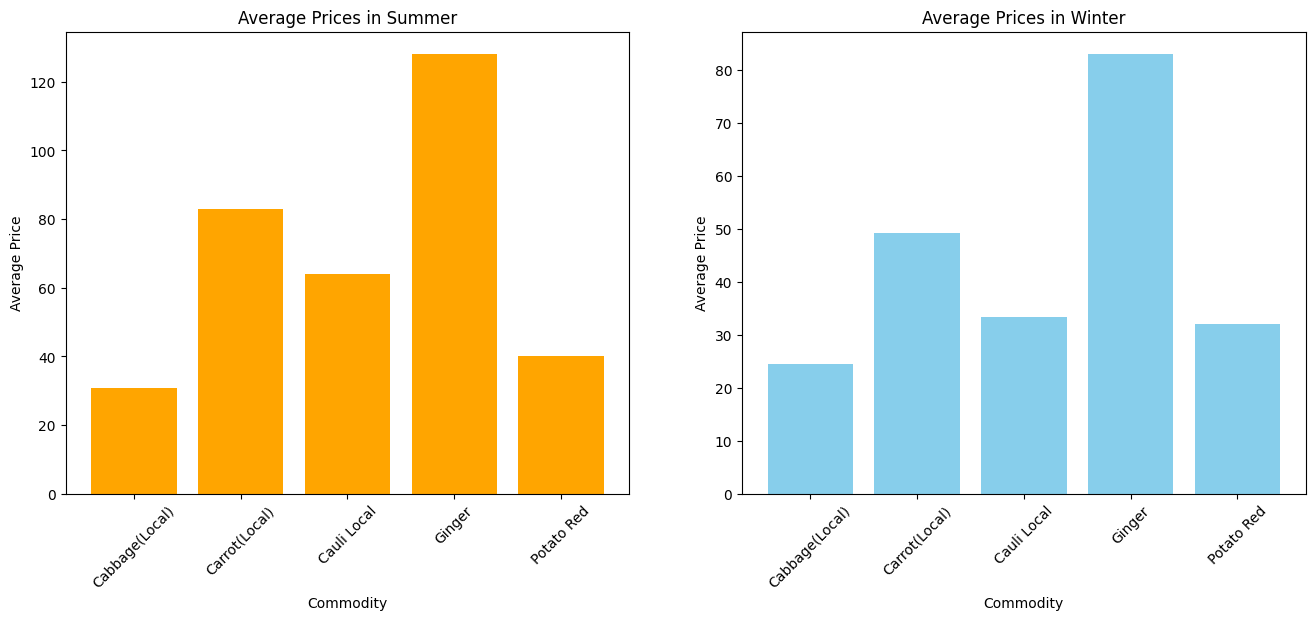

In [203]:
st.title('Price Comparison: High vs Low Demand Periods')

# Example: Comparing prices between summer (high demand) and winter (low demand)
summer_data = data[(data['Date'].dt.month >= 6) & (data['Date'].dt.month <= 8)]
winter_data = data[(data['Date'].dt.month >= 12) | (data['Date'].dt.month <= 2)]

summer_avg_prices = summer_data.groupby('Commodity')['Average'].mean().reset_index()
winter_avg_prices = winter_data.groupby('Commodity')['Average'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.bar(summer_avg_prices['Commodity'], summer_avg_prices['Average'], color='orange')
ax1.set_xlabel('Commodity')
ax1.set_ylabel('Average Price')
ax1.set_title('Average Prices in Summer')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(winter_avg_prices['Commodity'], winter_avg_prices['Average'], color='skyblue')
ax2.set_xlabel('Commodity')
ax2.set_ylabel('Average Price')
ax2.set_title('Average Prices in Winter')
ax2.tick_params(axis='x', rotation=45)

st.pyplot(fig)


In [204]:
st.title('Outlier Analysis in Commodity Prices')

for commodity in selected_commodities:
    subset = data[data['Commodity'] == commodity]['Average']
    st.subheader(f'Box Plot of Prices for {commodity}')
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(x=subset, ax=ax, color='lightblue')
    ax.set_xlabel('Average Price')
    ax.set_title(f'Box Plot of Prices for {commodity}')
    st.pyplot(fig)


## Question: 
#### Can we identify and classify seasonal patterns in commodity prices based solely on historical data?

#### Practical Motivation:

Understanding seasonal patterns in commodity prices is crucial for various stakeholders in agriculture, retail, and policymaking. It helps in planning production cycles, optimizing inventory management, and anticipating price fluctuations. By analyzing historical data, we can categorize commodities into seasonal groups (e.g., seasonal, non-seasonal) and identify which commodities exhibit predictable seasonal price variations.

In [171]:
# Create an empty figure
fig = px.line(title='Average Price Trends of Selected Commodities Over Time')

# Iterate over each commodity and add traces to the figure
for commodity in selected_commodities:
    subset = data[data['Commodity'] == commodity]
    fig.add_scatter(x=subset['Date'], y=subset['Average'], mode='lines', name=commodity)

# Customize layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Average Price',
    legend_title='Commodity',
)

# Show the plot
fig.show()

In [172]:
# Create separate figures for each commodity
for commodity in selected_commodities:
    # Filter data for the current commodity
    subset = data[data['Commodity'] == commodity]
    
    # Create an empty figure
    fig = px.line(subset, x='Date', y='Average', title=f'Average Price Trend of {commodity} Over Time')
    
    # Customize layout
    fig.update_layout(
        xaxis_title='Date',
        yaxis_title='Average Price',
        legend_title='Commodity',
    )
    
    # Show the plot
    fig.show()

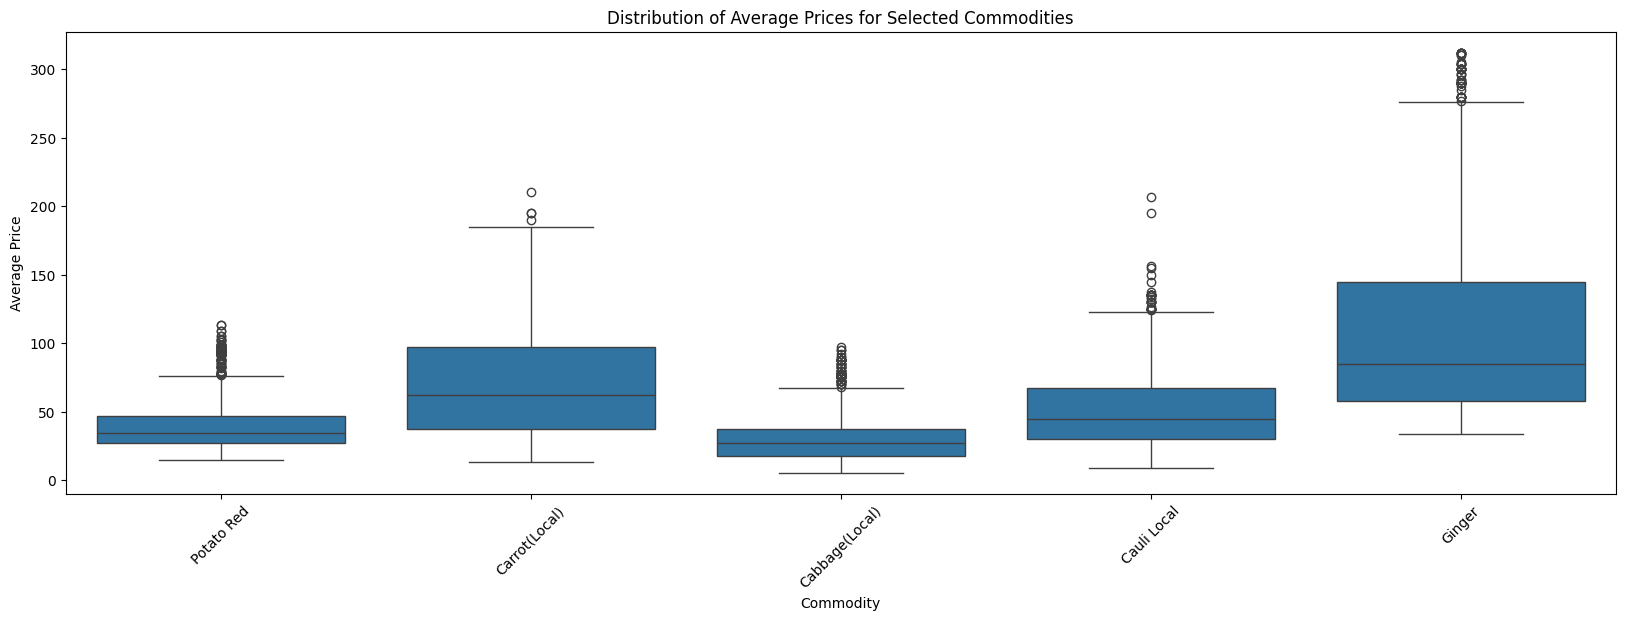

In [173]:
# Creating a box plot for the distribution of average prices of the selected commodities
plt.figure(figsize=(20, 6))
sns.boxplot(x='Commodity', y='Average', data=data[data['Commodity'].isin(selected_commodities)])
plt.title('Distribution of Average Prices for Selected Commodities')
plt.xlabel('Commodity')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


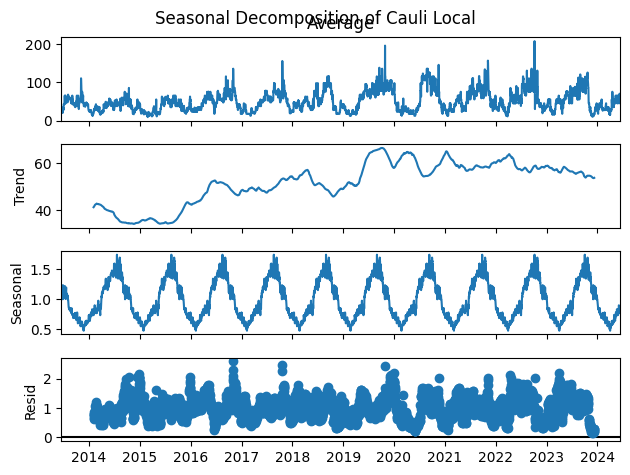

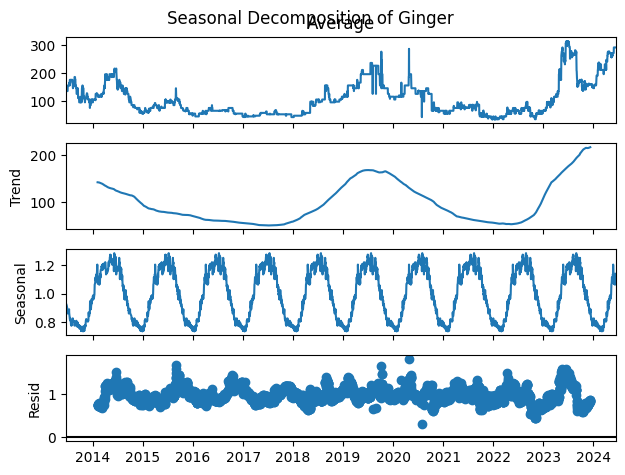

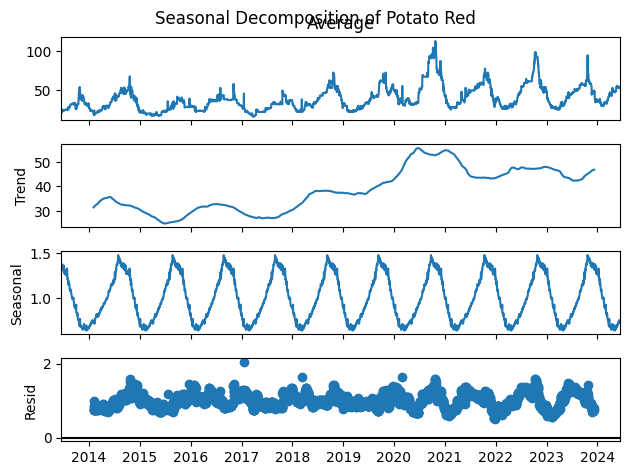

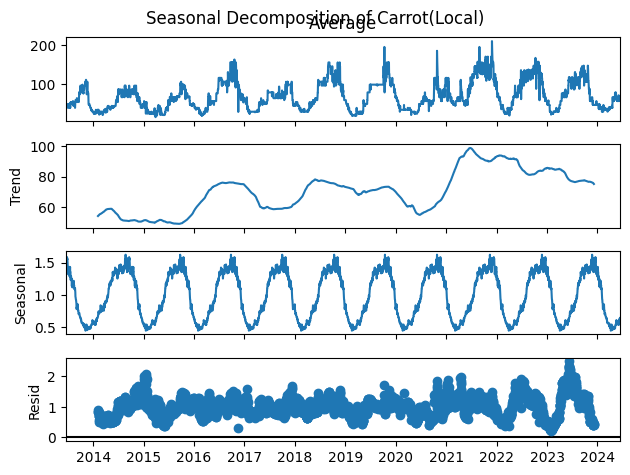

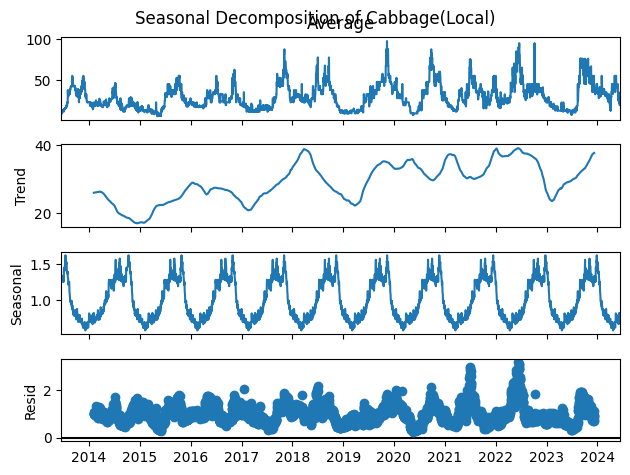

In [174]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Decomposing the time series for one selected commodity
for vegetable in selected_commodities:
    commodity_data = data[data['Commodity'] == vegetable]
    commodity_data.set_index('Date', inplace=True)
    decomposition = seasonal_decompose(commodity_data['Average'], model='multiplicative', period=365)

    decomposition.plot()
    plt.suptitle(f'Seasonal Decomposition of {vegetable}')
    plt.show()

In [175]:
import plotly.graph_objects as go

In [176]:
# List of commodities to compare
commodities_to_compare = ['Tomato Big(Nepali)', 'Tomato Big(Indian)','Tomato Small(Local)', 'Tomato Small(Indian)']

# Create traces for each commodity
fig = go.Figure()

for commodity in commodities_to_compare:
    subset = data[data['Commodity'] == commodity]
    fig.add_trace(go.Scatter(x=subset['Date'], y=subset['Average'], mode='lines', name=commodity))

# Customize layout
fig.update_layout(
    title='Comparison of Tomato Prices (Big Nepali vs Big Indian)',
    xaxis_title='Date',
    yaxis_title='Average Price',
    legend_title='Commodity',
    hovermode='x',
    hoverlabel=dict(bgcolor="white", font_size=12, font_family="Rockwell")
)

# Show the plot
fig.show()

In [177]:
indian_data = data[data['Commodity'].str.contains('Indian')|data['Commodity'].str.contains('Nepali')|data['Commodity'].str.contains('Local')]
indian_data['Commodity'].unique()

array(['Tomato Big(Nepali)', 'Tomato Small(Local)', 'Onion Dry (Indian)',
       'Carrot(Local)', 'Cabbage(Local)', 'Cauli Local',
       'Raddish White(Local)', 'French Bean(Local)',
       'Pointed Gourd(Local)', 'Cucumber(Local)', 'Papaya(Nepali)',
       'Garlic Dry Nepali', 'Orange(Nepali)', 'Pear(Local)',
       'Litchi(Local)', 'Potato Red(Indian)', 'Papaya(Indian)',
       'Litchi(Indian)', 'Tomato Big(Indian)', 'Tomato Small(Indian)',
       'Orange(Indian)', 'Cauli Local(Jyapu)'], dtype=object)

In [178]:
indian_nepali_data = data[data['Commodity'].str.contains('Onion')|data['Commodity'].str.contains('Potato')|data['Commodity'].str.contains('Tomato')|data['Commodity'].str.contains('Litchi')|data['Commodity'].str.contains('Orange')]

In [179]:
Potatodata = data[data['Commodity'].str.contains('Potato')]

avg_prices = Potatodata.groupby('Commodity')['Average'].mean().reset_index()
# Plot using Plotly
fig = px.bar(avg_prices, x='Commodity', y='Average', title='Average Price of Indian and Nepali Products')
fig.update_xaxes(title='Commodity')
fig.update_yaxes(title='Average Price')

# Show the plot
fig.show()

In [186]:
# Aggregate data to compute average price for each commodity
indian_data = data[data['Commodity'].str.contains('Indian')]
avg_prices = indian_nepali_data.groupby('Commodity')['Average'].mean().reset_index()

# Plot using Plotly
fig = px.bar(avg_prices, x='Commodity', y='Average', title='Average Price of Indian and Local Product')
fig.update_xaxes(title='Commodity')
fig.update_yaxes(title='Average Price')

# Show the plot
fig.show()

In [181]:
data['Price_Range'] = data['Maximum'] - data['Minimum']

volatility_by_year = data.groupby(['Commodity', pd.to_datetime(data['Date']).dt.year])['Price_Range'].mean().reset_index()

volatility_pivot = volatility_by_year.pivot(index='Commodity', columns='Date', values='Price_Range')


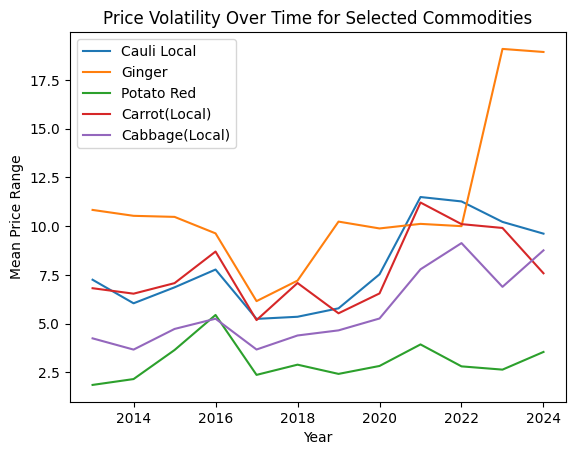

In [182]:
# Plot the price volatility for selected commodities
for commodity in selected_commodities:
    volatility_pivot.loc[commodity].plot(label=commodity)

plt.title('Price Volatility Over Time for Selected Commodities')
plt.xlabel('Year')
plt.ylabel('Mean Price Range')
plt.legend()
plt.show()

In [183]:
data.columns

Index(['Commodity', 'Date', 'Minimum', 'Maximum', 'Average', 'Price_Range'], dtype='object')

In [184]:
from scipy.signal import savgol_filter

IndexError: index 5 is out of bounds for axis 0 with size 5

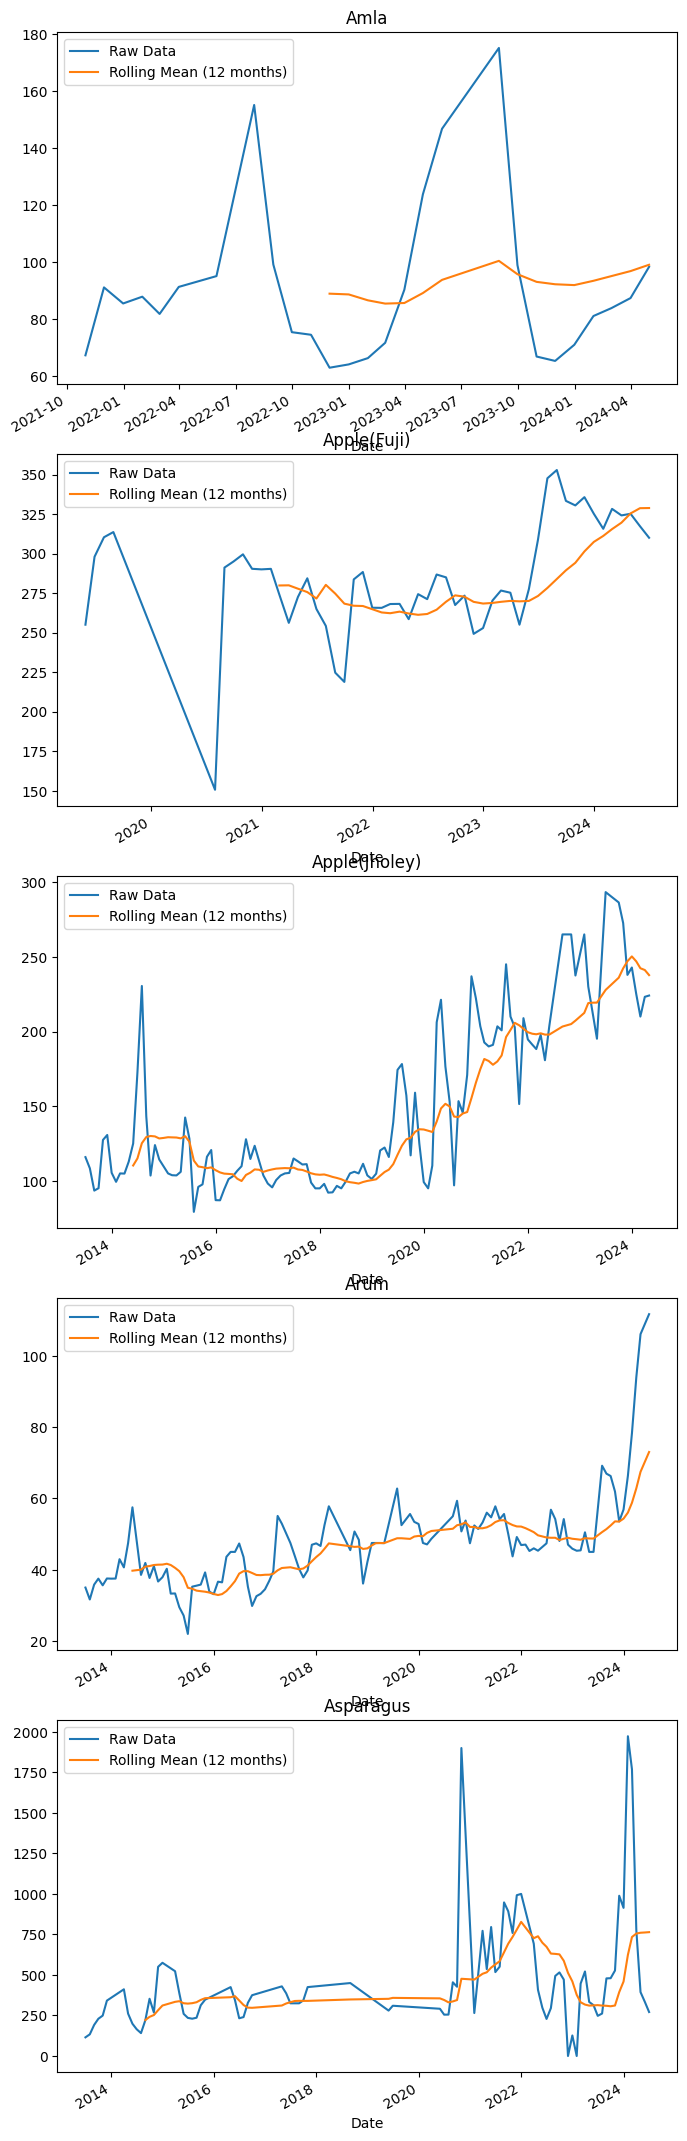

In [192]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller